In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn import set_config
set_config(transform_output='pandas')

%matplotlib inline
plt.style.use('seaborn-darkgrid')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (10, 8)

# Загрузка данных

In [2]:
# %%capture
# !wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [3]:
data = pd.read_excel('data/data_ford_price.xlsx', engine='openpyxl')

# Трансформация признаков

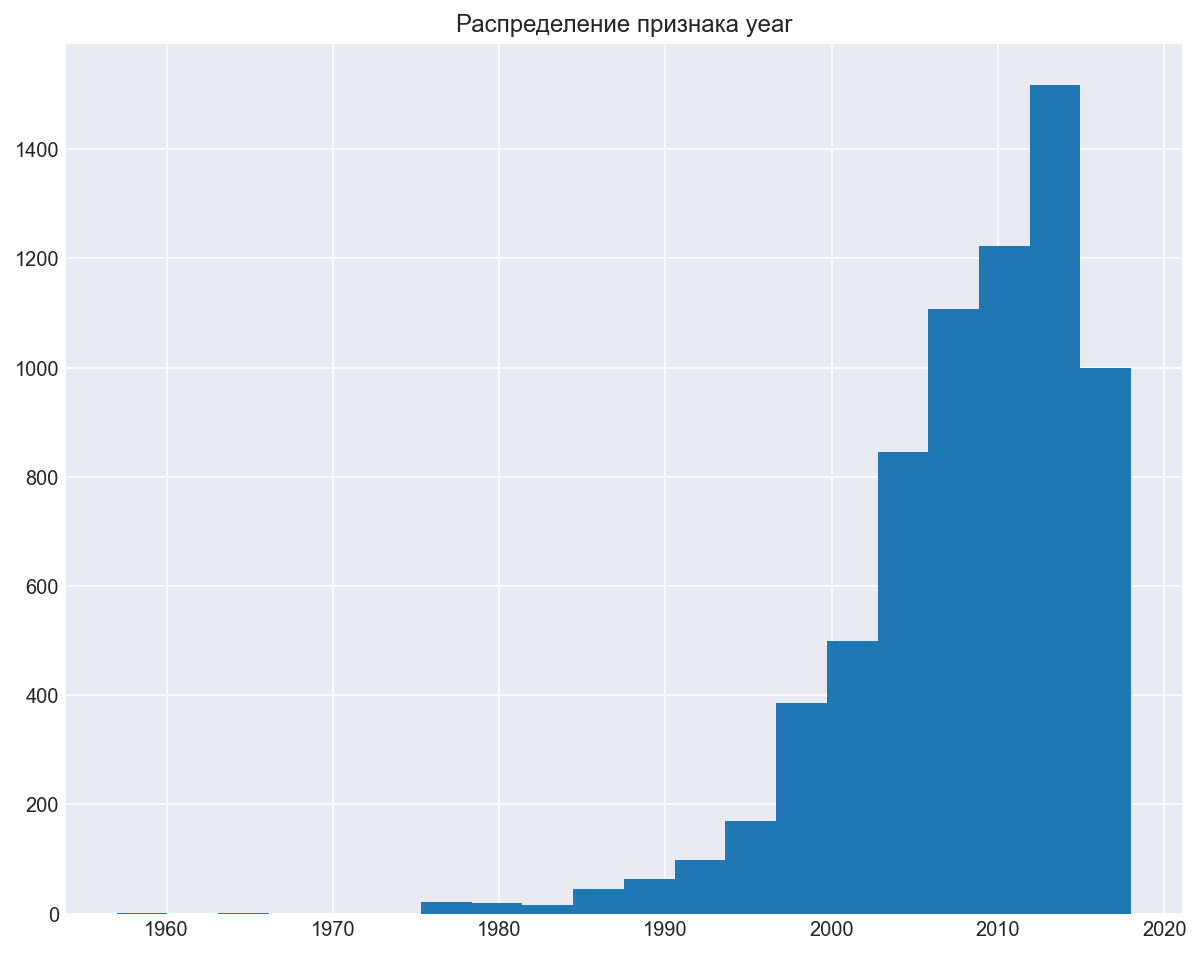

In [4]:
plt.hist(data.year, bins=20)
plt.title('Распределение признака year');

## Квантильное преобразование
Квантильная функция ранжирует или сглаживает взаимосвязь между наблюдениями и может быть отображена на другие распределения (равномерное или нормальное).

In [5]:
data

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


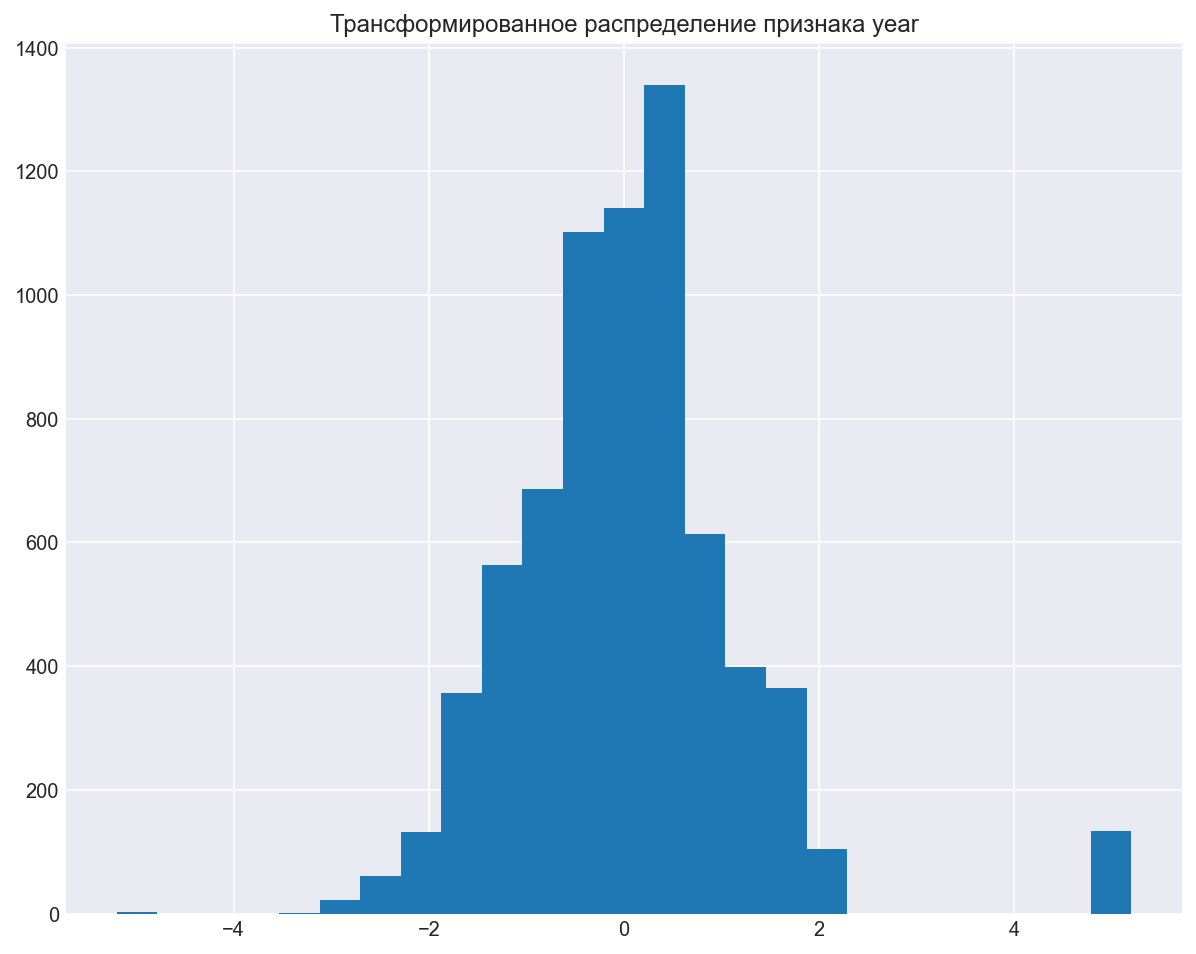

In [6]:
# У класса есть аргумент output_distribution, который может принимать значение 'uniform' или 'normal' (по умолчанию — 'uniform')
quantile = QuantileTransformer(output_distribution='normal')
# подавать данные нужно в виде двумерного массива или в виде датафрейма, поэтому тут двойные скобки, иначе была series
data['year_quant'] = quantile.fit_transform(data[['year']])
 
plt.hist(data['year_quant'], bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

### Задание 6.1
Преобразуйте распределение признаков condition и cylinders в равномерное. 

Какое значение признака condition получится у нулевого объекта? Ответ округлите до второго знака после точки-разделителя.

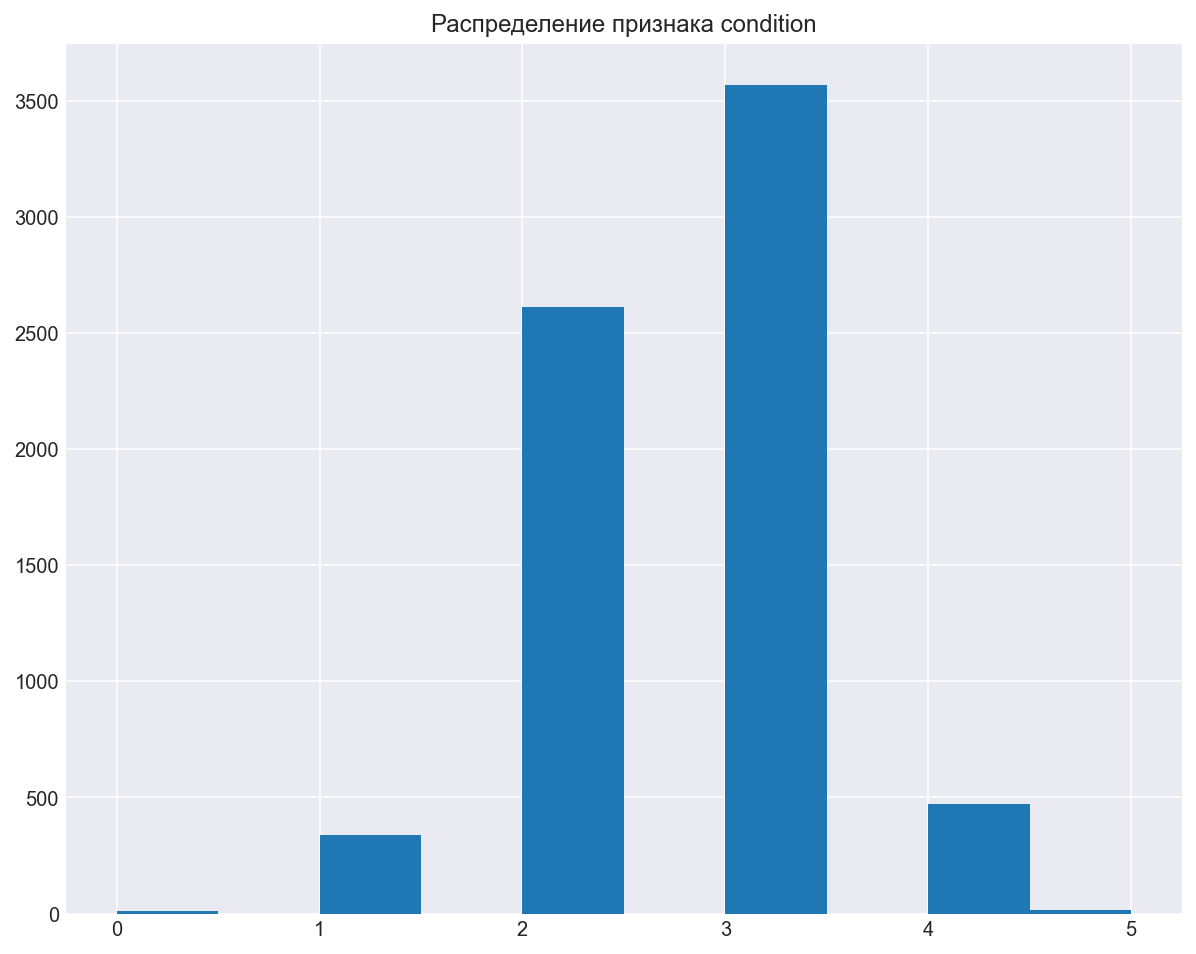

In [7]:
plt.hist(data.condition)
plt.title('Распределение признака condition');

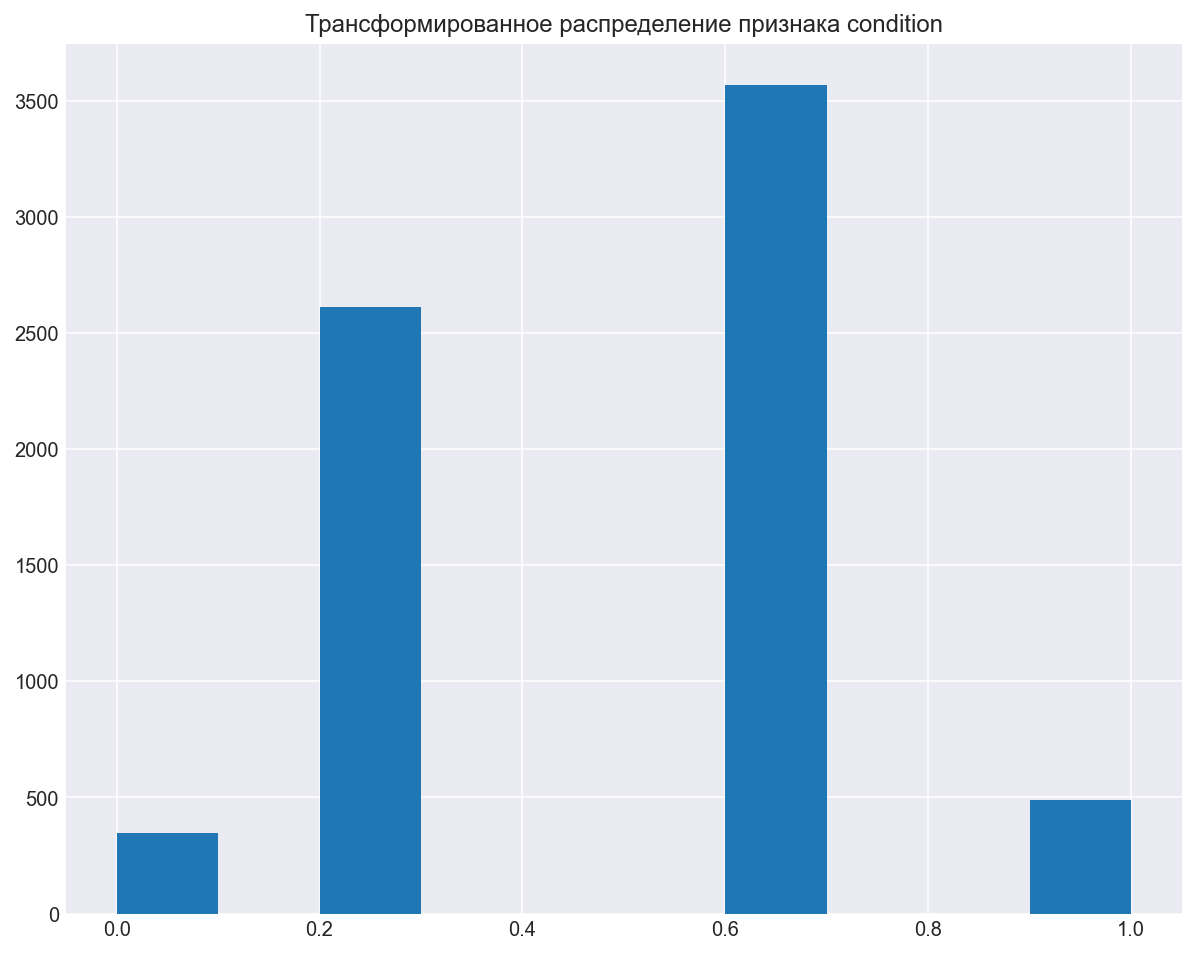

In [8]:
quantile = QuantileTransformer(output_distribution='uniform')
data['condition_quant'] = quantile.fit_transform(data[['condition']])
 
plt.hist(data['condition_quant'])
plt.title('Трансформированное распределение признака condition')
plt.show()

Два способа обращения к данным в датафрейме

In [9]:
round(data['condition_quant'][0], 2)

0.96

In [10]:
round(data.loc[0, 'condition_quant'], 2)

0.96

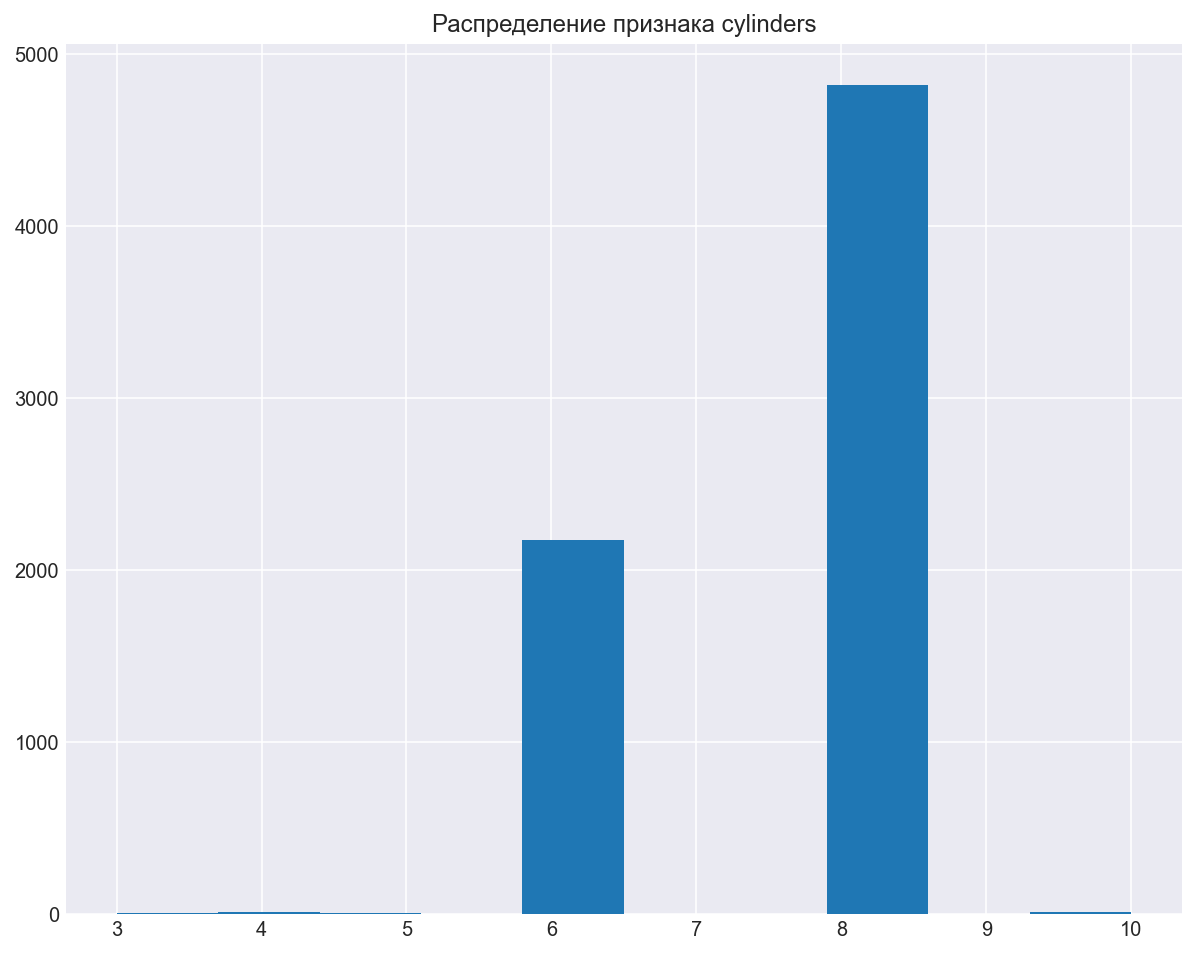

In [11]:
plt.hist(data.cylinders)
plt.title('Распределение признака cylinders');

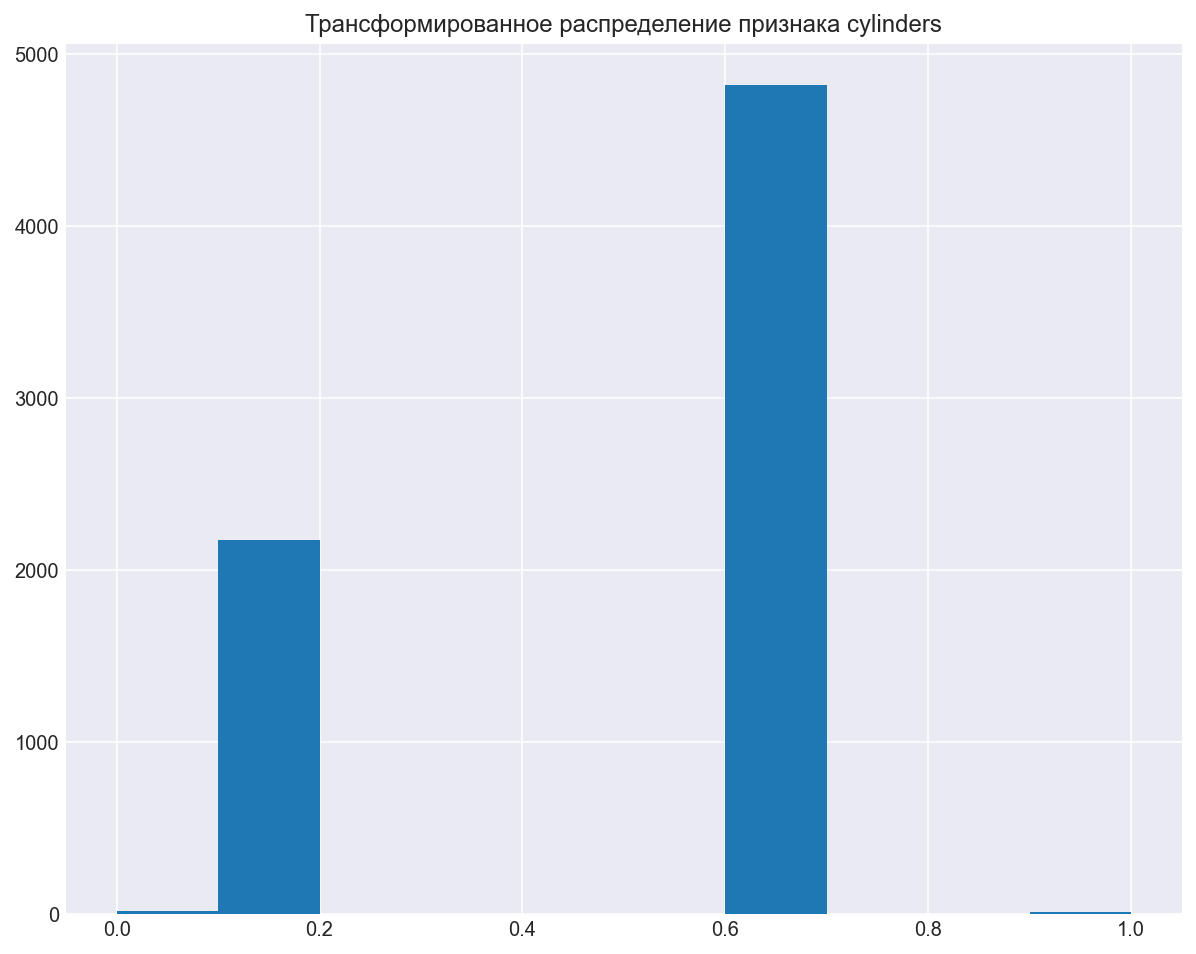

In [12]:
quantile = QuantileTransformer(output_distribution='uniform')
data['cylinders_quant'] = quantile.fit_transform(data[['cylinders']])
 
plt.hist(data['cylinders_quant'])
plt.title('Трансформированное распределение признака cylinders')
plt.show()

## Логарифмическое преобразование

Посмотрим на распределение признака price. Оно асимметрично, причём значения варьируются от 0 до ~300000.

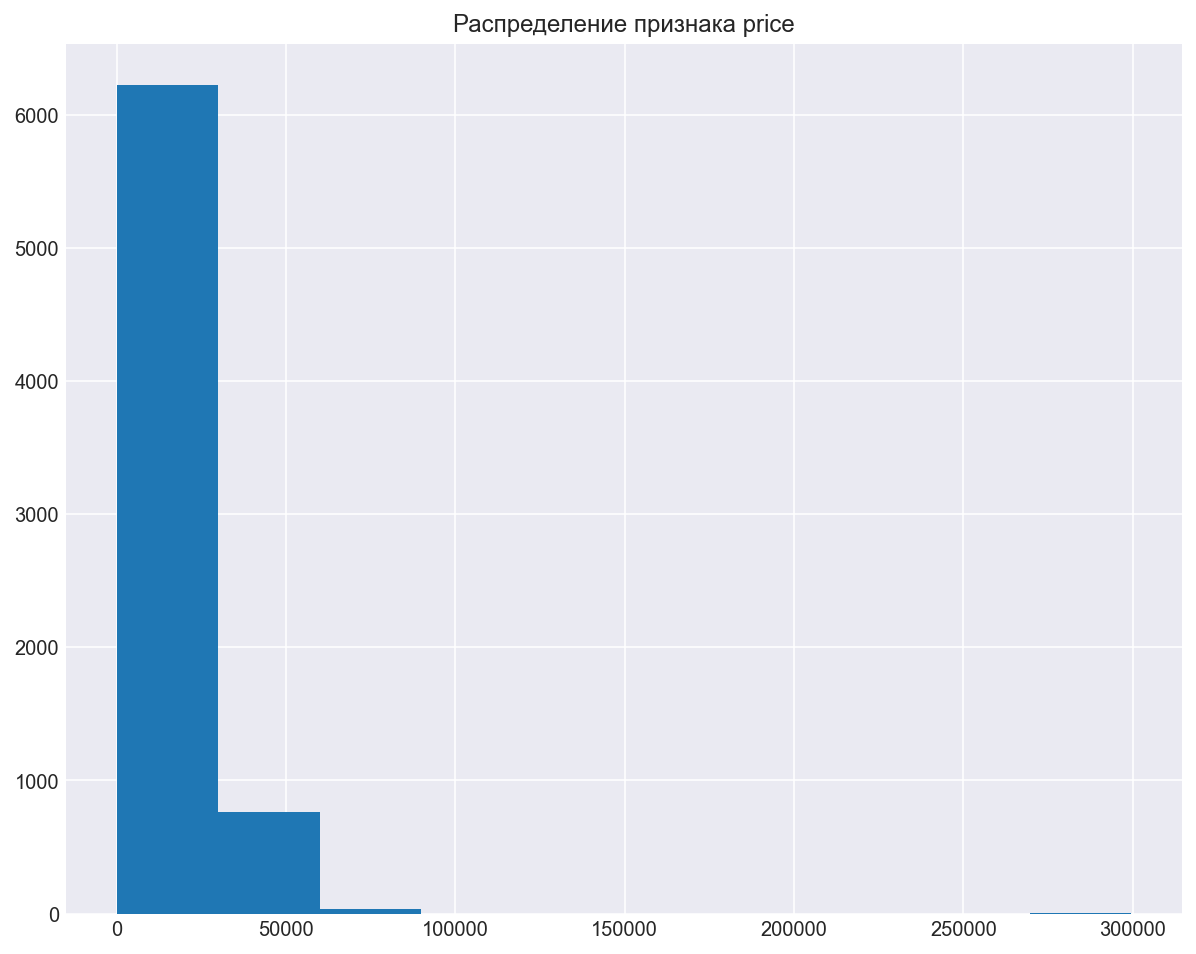

In [13]:
plt.hist(data.price)
plt.title('Распределение признака price');

Идеальный кандидат для логарифмического преобразования — применим его. На этот раз обойдёмся силами numpy.

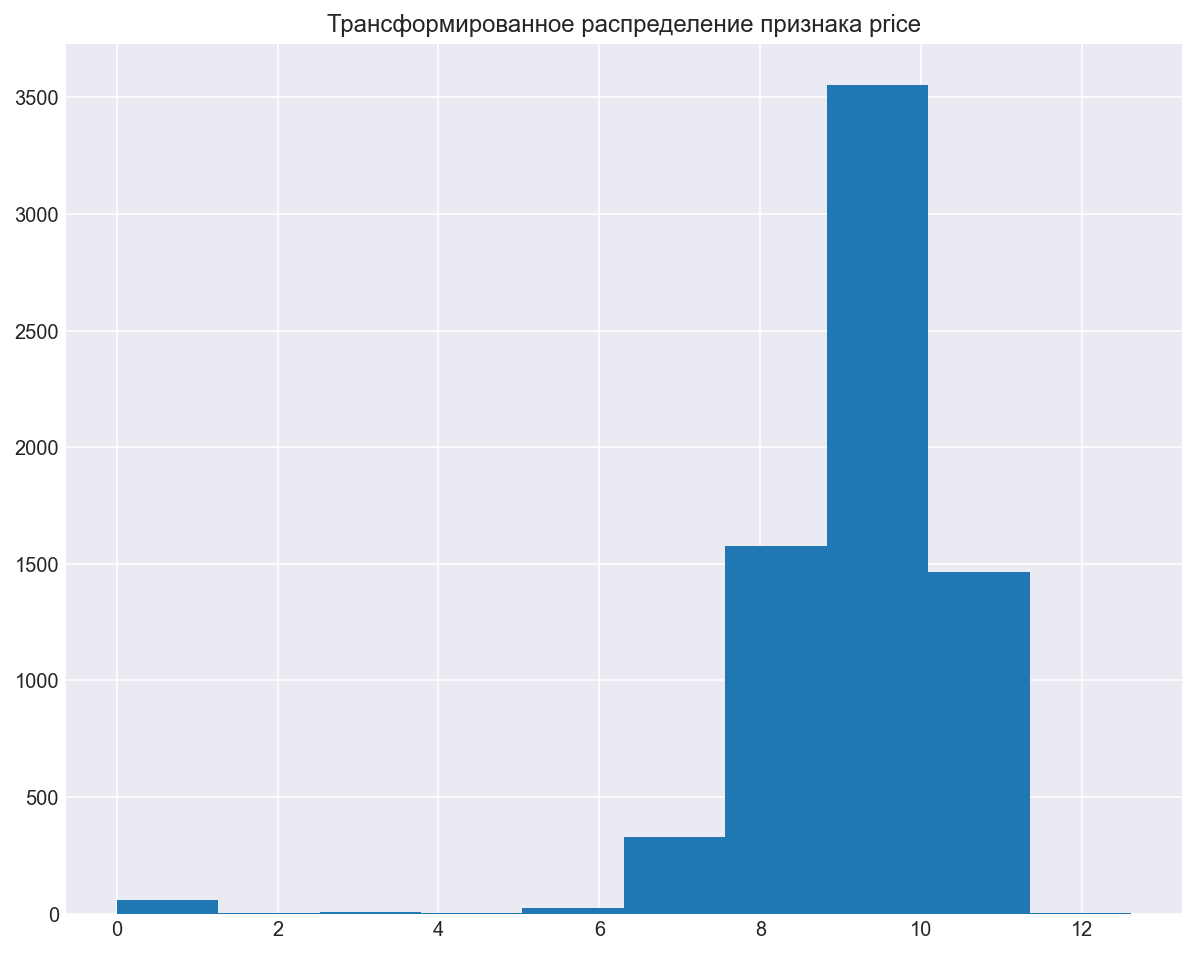

In [14]:
data['log_price'] = np.log(data['price'])
 
plt.hist(data['log_price'])
plt.title('Трансформированное распределение признака price')
plt.show()

Давайте также сравним значения исходного и трансформированного признака

In [15]:
data[['price', 'log_price']].describe()

,price,log_price
count,7017.000000,7017.000000
mean,15121.549523,9.204510
std,11765.423119,1.275868
min,1.000000,0.000000
25%,5995.000000,8.698681
50%,12750.000000,9.453287
75%,21995.000000,9.998570
max,299500.000000,12.609870


### Задание 6.3
Какое значение признака transformed_price имеет последний объект? Ответ округлите до одного знака после точки-разделителя.

In [16]:
data['log_price'].iloc[-1].round(1)

9.8

## Преобразование Бокса-Кокса

Как и другие скейлеры, с которыми вы уже познакомились, Power Transformer также изменяет распределение переменной, то есть делает его более гауссовым (нормальным).

Однако чтобы использовать все изученные раннее методы трансформации и скейлинга, необходимо сначала понять исходное распределение признака, а затем уже делать выбор. Power Transformer фактически автоматизирует принятие этого решения, вводя параметр, называемый lambda. Он принимает решение об обобщённом степенном преобразовании, находя наилучшее значение , используя один из следующих параметрических методов:

Преобразование Бокса-Кокса, которое работает для положительных значений признака.
Преобразование Йео-Джонсона, которое учитывает при расчётах нулевые и отрицательные значения обрабатываемых переменных.
В нашем случае мы будем использовать преобразование Бокса-Кокса, так как все значения положительны.

In [17]:
from sklearn.preprocessing import PowerTransformer

box_cox = PowerTransformer(method='box-cox')
 
data_box_cox = box_cox.fit_transform(data[['price', 'year']])
data_box_cox = pd.DataFrame(data_box_cox, columns = ['transformed_price', 'transformed_year'])

c:\Users\avvoy\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\avvoy\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:246: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [18]:
from sklearn.preprocessing import PowerTransformer

box_cox = PowerTransformer(method='box-cox')
 
data[['transformed_price', 'transformed_year']] = box_cox.fit_transform(data[['price', 'year']])

c:\Users\avvoy\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\avvoy\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:246: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


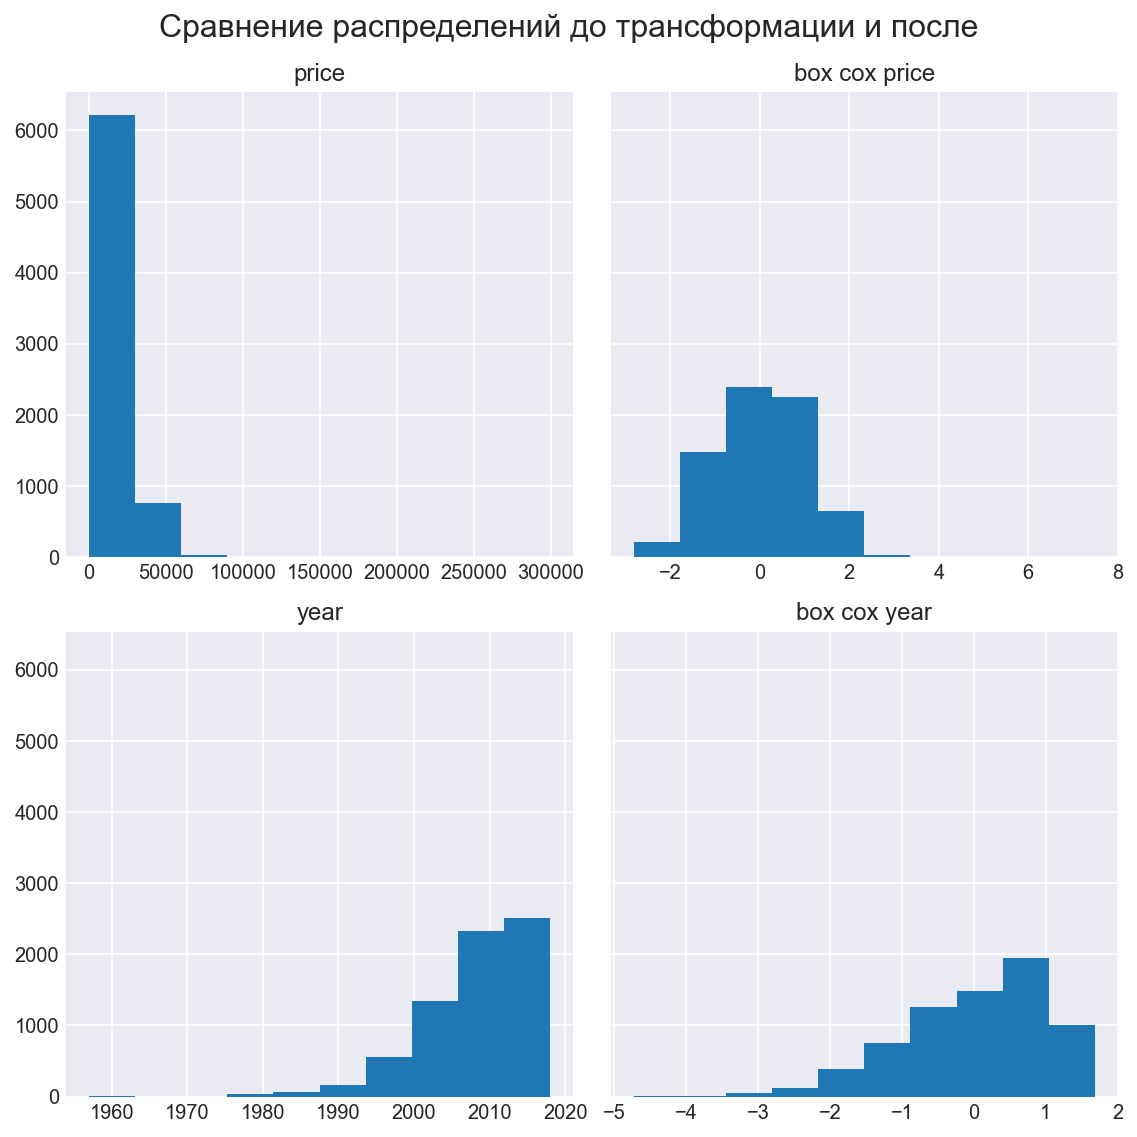

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharey=True)
axs[0][0].hist(data['price'])
axs[1][0].hist(data['year'])
axs[0][1].hist(data['transformed_price'])
axs[1][1].hist(data['transformed_year'])

axs[0][0].set(title='price')
axs[0][1].set(title='box cox price')

axs[1][0].set(title='year')
axs[1][1].set(title='box cox year')

fig.suptitle('Сравнение распределений до трансформации и после', size=16)
plt.tight_layout()
plt.show()

# Реализация Box-Cox через библиотеку scipy.stats

In [20]:
from scipy.stats import boxcox

transformed_data,_ = boxcox(data['price'])
data['box_cox_price']= transformed_data

In [21]:
data[['transformed_price', 'box_cox_price']]

,transformed_price,box_cox_price
0,1.910471,180.221424
1,0.270352,117.718191
2,-1.369721,55.216734
3,-1.718754,41.915452
4,0.132932,112.481271
...,...,...
7012,0.780988,137.177987
7013,-0.733027,79.480474
7014,-0.238492,98.326686
7015,-0.145148,101.883936


Значения другие, но рспределение абсолютно такое же

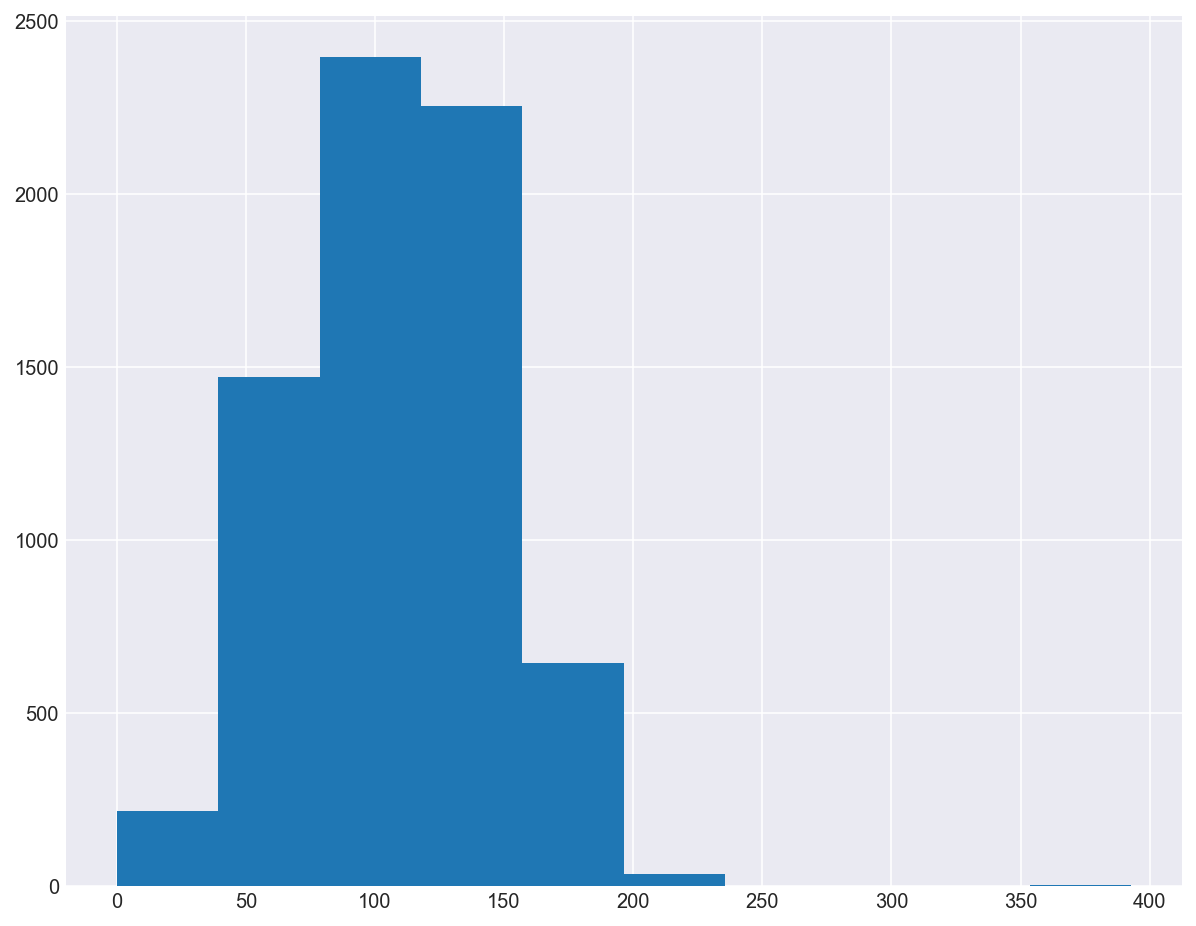

In [22]:
data['box_cox_price'].hist();

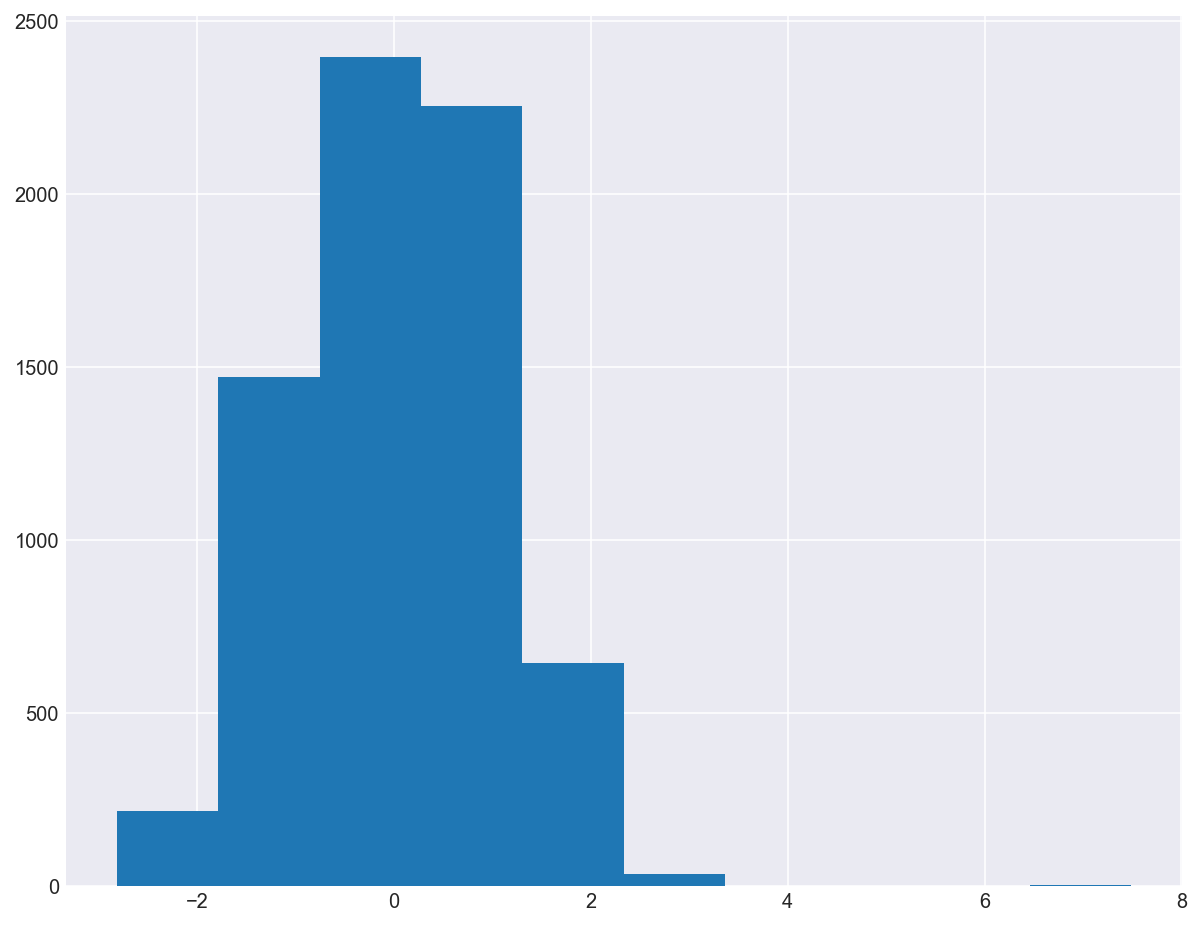

In [23]:
data['transformed_price'].hist();